In [1]:
from umap import UMAP
from twilite.preprocessing import FeatureFilter, Decomposition
from twilite.model_tuning import GridSearch, Model
from twilite.database import Storage
from twilite.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import json

In [2]:
database = 'alz'
creds = json.load(open("creds.json"))
db = Storage(creds=creds, db=database)
models = [Model(model=KMeans, eval_range=range(2, 10))]
db.create_all()

In [3]:
hashtag_user = Pipeline(
    steps=[
        FeatureFilter(user_num=5, ft_freq=50, ft_num=3),
        Decomposition(scalar=StandardScaler(), mapper=UMAP(n_components=2))
    ],
    evaluate=GridSearch(models=models, metric=silhouette_score),
    feature='ht_user',
    database=db
)

In [4]:
hashtag_user.run()

[ETL 1/4] COMPLETE ............. EXTRACT, TOTAL TIME=   6.9s


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[ETL 2/4] COMPLETE ...... TRANSFORMATION, TOTAL TIME=   3.5s
[ETL 3/4] COMPLETE .... MODEL EVALUATION, TOTAL TIME=   0.3s
[ETL 4/4] COMPLETE ........... LOAD DATA, TOTAL TIME=   1.4s
PROCESS COMPLETE ...................... , TOTAL TIME=  12.1s


<AxesSubplot:xlabel='xcord', ylabel='ycord'>

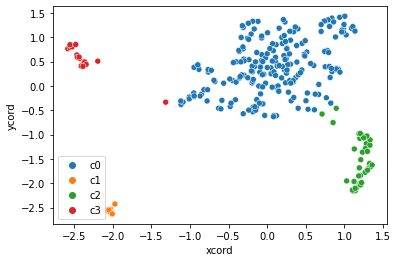

In [5]:
hashtag_user.scatter_plot()